##### 라이브러리와 데이터 세트 포함

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# cifar10 데이터 세트를 가져올 때 certificate verify failed: certificate has expired (_ssl.c:1129) 에러가 발생하면 아래 코드로 해결한다.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# CFAR-10 데이터 세트를 적재한다.
# 훈련 세트와 테스트 세트를 반환받는다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

##### 영상 화면 표시

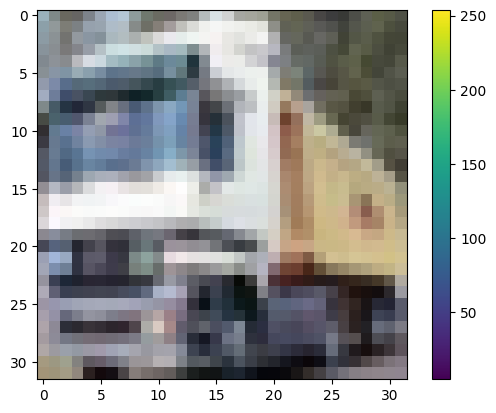

In [2]:
# 두 번째 영상(트럭)을 화면에 표시한다. 
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# 영상의 픽셀 값을 0에서 1 사이로 변환한다. 
X_train = X_train/255.0
X_test = X_test/255.0

##### 신경망 모델 구축

In [3]:
# 순차 모델을 구축한다. (CNN)
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 ), input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 80)                432720    
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                        

In [4]:
# 모델을 컴파일한다. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 모델을 훈련한다. 
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 35s 31ms/step - loss: 1.5153 - accuracy: 0.4530 - val_loss: 1.3060 - val_accuracy: 0.5489
Epoch 2/10
1094/1094 [==============================] - 36s 33ms/step - loss: 1.1823 - accuracy: 0.5811 - val_loss: 1.1592 - val_accuracy: 0.5923
Epoch 3/10
1094/1094 [==============================] - 32s 29ms/step - loss: 1.0289 - accuracy: 0.6402 - val_loss: 1.0588 - val_accuracy: 0.6303
Epoch 4/10
1094/1094 [==============================] - 32s 29ms/step - loss: 0.9148 - accuracy: 0.6783 - val_loss: 1.0372 - val_accuracy: 0.6420
Epoch 5/10
1094/1094 [==============================] - 32s 29ms/step - loss: 0.8224 - accuracy: 0.7120 - val_loss: 1.0236 - val_accuracy: 0.6467
Epoch 6/10
1094/1094 [==============================] - 36s 33ms/step - loss: 0.7430 - accuracy: 0.7398 - val_loss: 1.0500 - val_accuracy: 0.6495
Epoch 7/10
1094/1094 [==============================] - 38s 35ms/step - loss: 0.6659 - accuracy: 0.7639 - val_loss: 1.0616 -

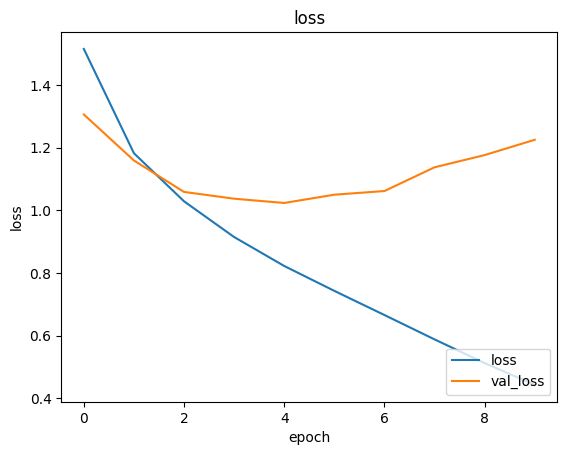

In [5]:
# 손실값을 그래프로 그린다. 
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

##### 테스트

313/313 [==============================] - 1s 4ms/step
정답= [3]
예측값= [6.82733371e-04 1.04759181e-06 4.00672900e-03 7.55617201e-01
 5.69929078e-04 1.11629911e-01 1.24342166e-01 7.24541314e-05
 3.05672456e-03 2.11976985e-05]
추정 결과 :  3 -> 고양이(cat)


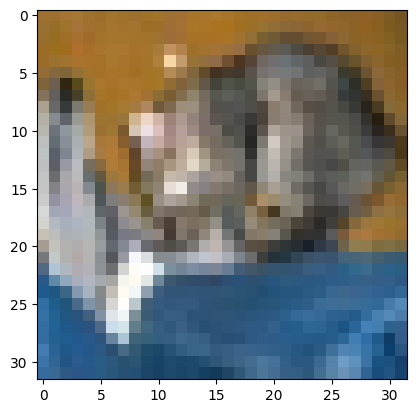

In [6]:
plt.figure()
plt.imshow(X_test[0])

y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0])

category = ['비행기(airplane)','자동차(automobile)','새(bird)','고양이(cat)','사슴(deer)','개(dog)','개구리(frog)','말(horse)','배(ship)','트럭(truck)']
print("추정 결과 : ", y_pred[0].argmax(), "->", category[y_pred[0].argmax()])   #원핫인코딩